# Principal Component Analysis: Player Attribute Analysis

In this notebook, we'll implement PCA to analyze player attributes and reduce the dimensionality of our dataset. This will help us understand the key patterns and relationships between different player statistics.

## Our Task
We'll implement PCA to:
1. Reduce the dimensionality of our player attributes
2. Identify the most important combinations of features
3. Visualize player distributions in reduced dimensions

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_theme()

## PCA Implementation

In [26]:
class PCA:
    def __init__(self, n_components=None):
        self.n_components = n_components
        self.components_ = None
        self.mean_ = None
        self.explained_variance_ratio_ = None
        
    def fit(self, X):
        # Center the data
        self.mean_ = np.mean(X, axis=0)
        X_centered = X - self.mean_
        
        # Compute SVD
        U, sigma, Vt = np.linalg.svd(X_centered, full_matrices=False)
        
        # Store components (eigenvectors)
        self.components_ = Vt
        
        # Compute explained variance ratio
        explained_variance = (sigma ** 2) / (X.shape[0] - 1)
        total_variance = np.sum(explained_variance)
        self.explained_variance_ratio_ = explained_variance / total_variance
        
        return self
    
    def transform(self, X):
        # Center the data using mean from fit
        X_centered = X - self.mean_
        
        # Project data onto principal components
        if self.n_components is not None:
            return np.dot(X_centered, self.components_[:self.n_components].T)
        return np.dot(X_centered, self.components_.T)
    
    def fit_transform(self, X):
        return self.fit(X).transform(X)

## Load and Prepare Data

In [27]:
# Load the dataset
players_df = pd.read_csv("../data/players_data.csv")

# Select features for PCA
features = ["shooting", "defending", "pace", "dribbling", "physic"]
filtered_df = players_df.dropna(subset=features)
X = filtered_df[features].values

# Standardize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

/var/folders/pz/s1ggtx853xx_qxny9g89ffgm0000gn/T/ipykernel_7370/4037655952.py:2: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  players_df = pd.read_csv("../data/players_data.csv")


## Apply PCA

In [28]:
# Initialize and fit PCA
pca = PCA()
pca.fit(X_scaled)

# Calculate explained variance percentage
per_var = np.round(pca.explained_variance_ratio_ * 100, 2)
print("Explained variance percentage by each component:")
for i, var in enumerate(per_var):
    print(f"PC{i+1}: {var}%")

Explained variance percentage by each component:
PC1: 46.08%
PC2: 28.08%
PC3: 14.23%
PC4: 9.41%
PC5: 2.21%


## Visualize Results

From this visualization, we can see that we should consider at least up to PCA3 to get good seperation of the data.

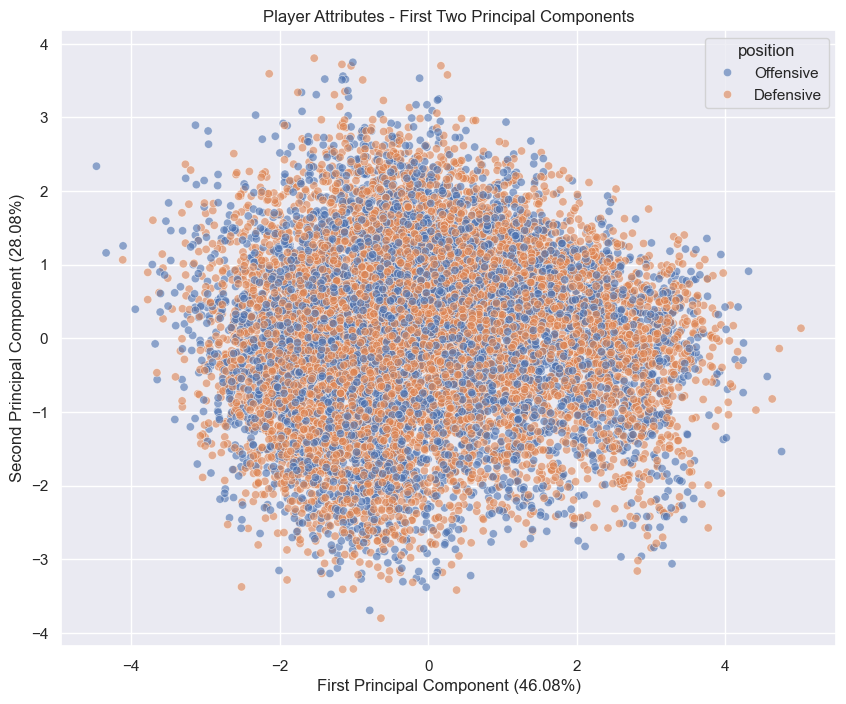

In [33]:
# Transform data to first two principal components
X_pca = pca.transform(X_scaled)
pca_df = pd.DataFrame(data=X_pca[:, :2], columns=['PC1', 'PC2'])

# Define offensive and defensive positions
offensive_positions = ['ST', 'CF', 'LW', 'RW', 'CAM']
defensive_positions = ['CB', 'LB', 'RB', 'CDM', 'LWB', 'RWB']

# Create position labels
def get_position_class(position_str):
    positions = str(position_str).split(', ')
    if any(pos in offensive_positions for pos in positions):
        return 'Offensive'
    elif any(pos in defensive_positions for pos in positions):
        return 'Defensive'
    return None

# Add player positions for coloring
pca_df['position'] = players_df['player_positions'].apply(get_position_class)
# pca_df = pca_df.dropna(subset=[]+['position'])
# print(pca_df.head())


# Plot
plt.figure(figsize=(10, 8))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='position', alpha=0.6)
plt.title('Player Attributes - First Two Principal Components')
plt.xlabel(f'First Principal Component ({per_var[0]}%)')
plt.ylabel(f'Second Principal Component ({per_var[1]}%)')
plt.show()

## Analyze Feature Contributions

In [ ]:
# Create a DataFrame showing how each PC is composed of original features
pc_df = pd.DataFrame(
    data=pca.components_,
    columns=features,
    index=[f'PC{i+1}' for i in range(len(features))]
)
print("Principal Component Composition:")
pc_df

Principal Component Composition:


,shooting,defending,pace,dribbling,physic
PC1,-0.551334,0.396889,-0.458067,-0.533428,0.210091
PC2,0.262860,0.533770,0.011406,0.391984,0.701579
PC3,0.471096,-0.336949,-0.809542,-0.004759,0.095669
PC4,-0.010489,0.546101,-0.312399,0.430584,-0.647046
PC5,-0.636313,-0.381849,-0.192593,0.613496,0.189282
